# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [130]:
# Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## Challenge 1

#### The data we will use in this challenge is:

In [131]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

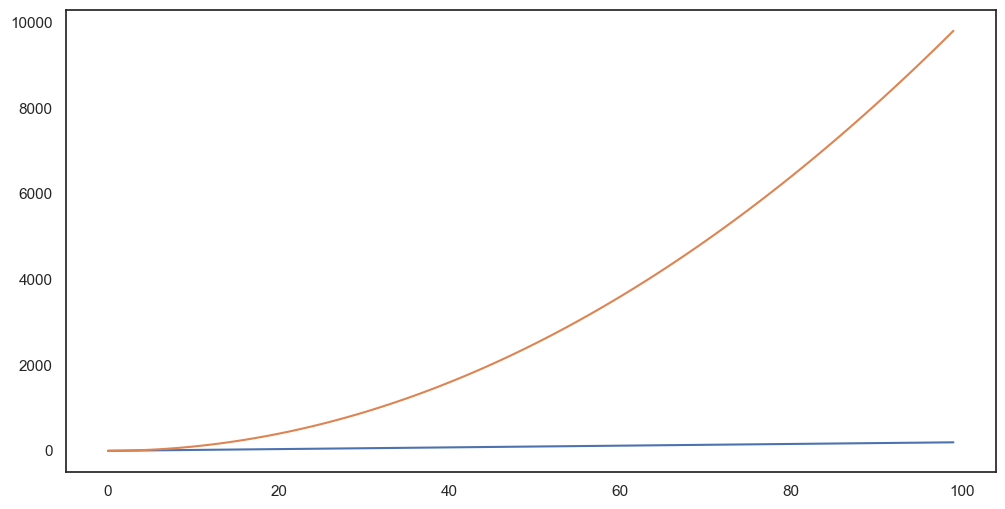

In [132]:
# Method 1

plt.plot(x,y)
plt.plot(x,z)
plt.show()

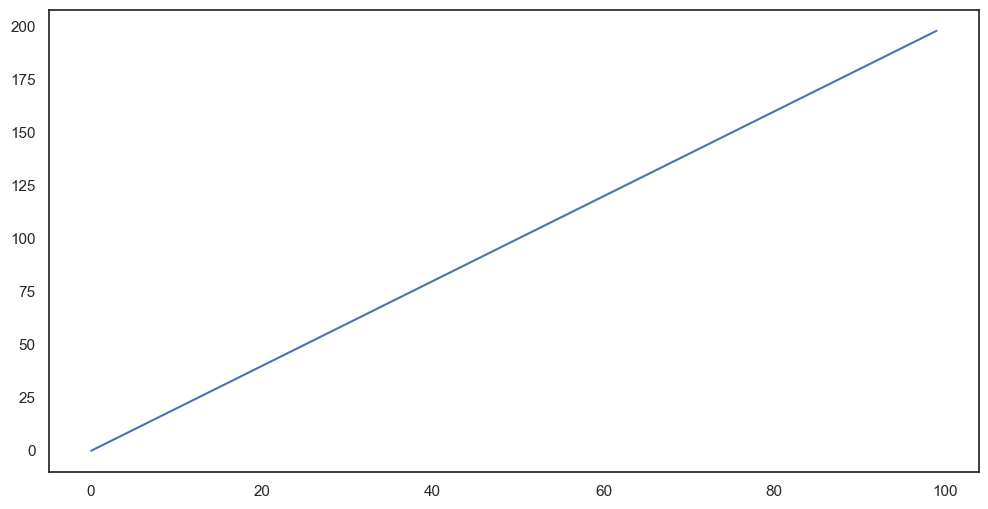

In [133]:
plt.plot(x,y)

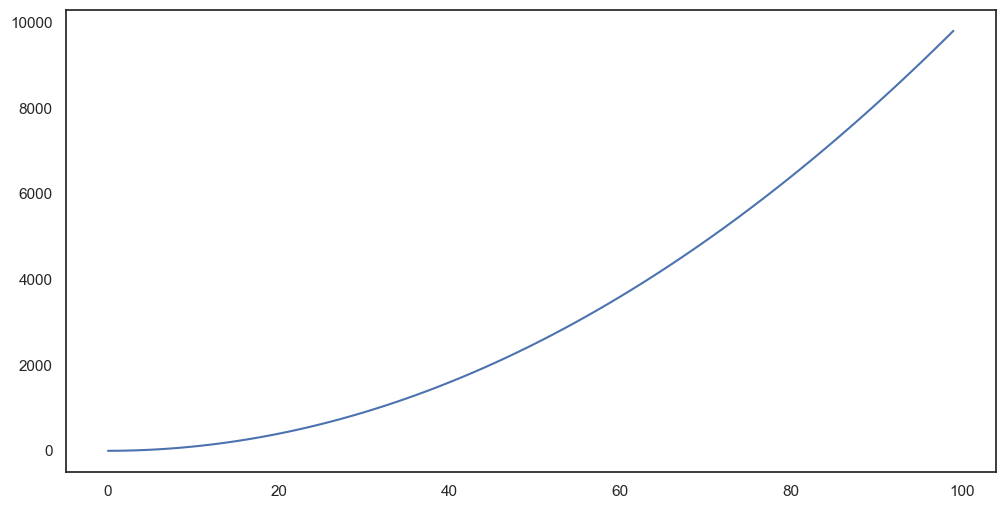

In [134]:
plt.plot(x,z)

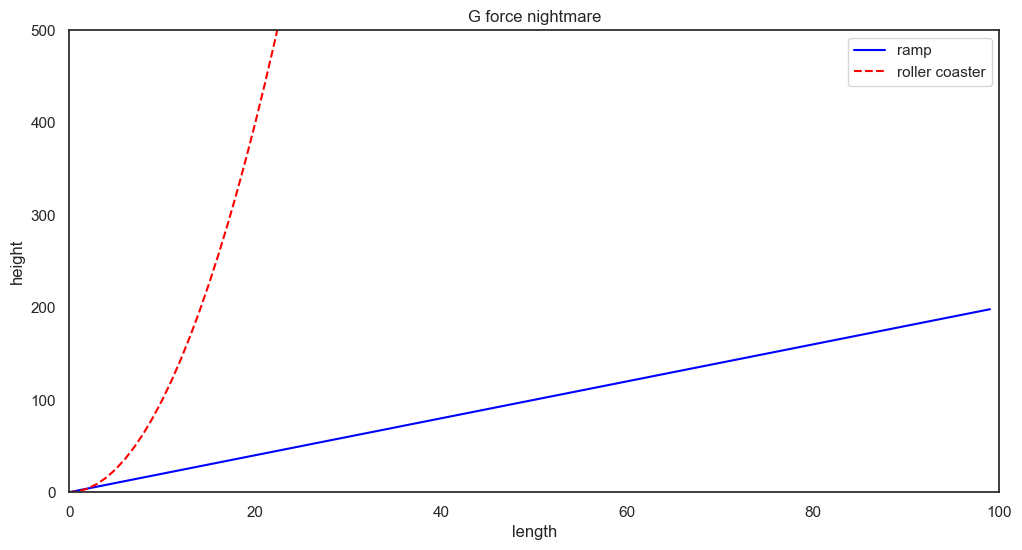

In [135]:
# Plot the data with customizations
plt.plot(x, y, label="ramp", color="blue")
plt.plot(x, z, label="roller coaster", linestyle="--", color="red")
plt.xlim(0,100)
plt.ylim(0,500)
plt.xlabel("length")
plt.ylabel("height")
plt.title("G force nightmare")
plt.legend()

plt.show()

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

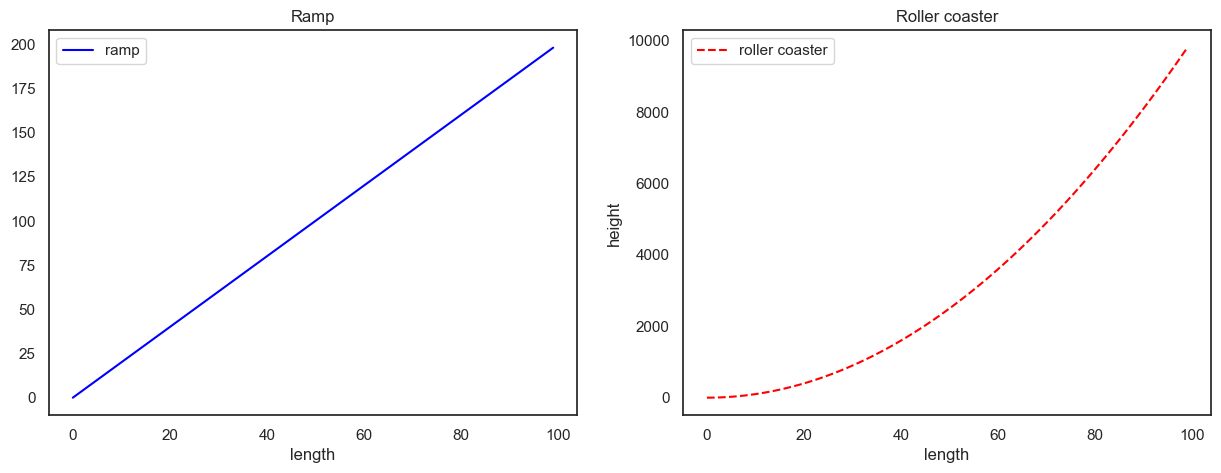

In [136]:
# Method 2

fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

ax1.plot(x, y, label="ramp", color="blue")
ax1.set_xlabel("height")
ax1.set_xlabel("length")
ax1.set_title("Ramp")
ax1.legend()


ax2.plot(x, z, label="roller coaster", linestyle="--", color="red")
ax2.set_ylabel("height")
ax2.set_xlabel("length")
ax2.set_title("Roller coaster")
ax2.legend()

plt.show()

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

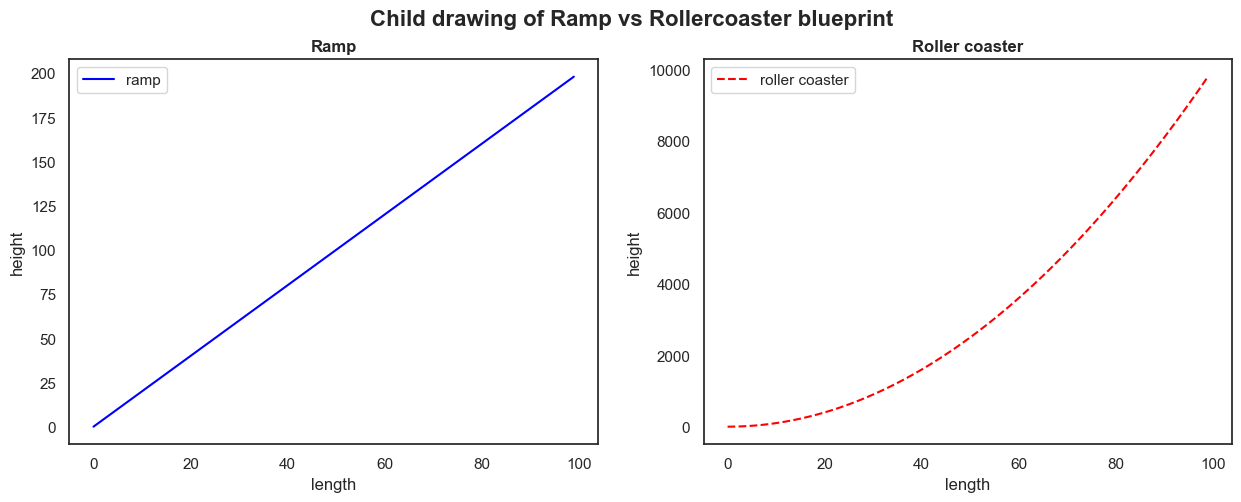

In [137]:
# your code here

fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

ax1.plot(x, y, label="ramp", color="blue")
ax1.set_xlabel("length")
ax1.set_ylabel("height")
ax1.set_title("Ramp", fontsize=12, fontweight="bold")
ax1.legend()

ax2.plot(x, z, label="roller coaster", linestyle="--", color="red")
ax2.set_xlabel("length")
ax2.set_ylabel("height")
ax2.set_title("Roller coaster", fontsize=12, fontweight="bold")
ax2.legend()

plt.suptitle("Child drawing of Ramp vs Rollercoaster blueprint", fontsize=16, fontweight="bold")

plt.show()

#### Plot both $y=x^2$ and $y=e^x$ in the same plot using normal and logarithmic scale.
**Hint**: Use `set_xscale` and `set_yscale`.

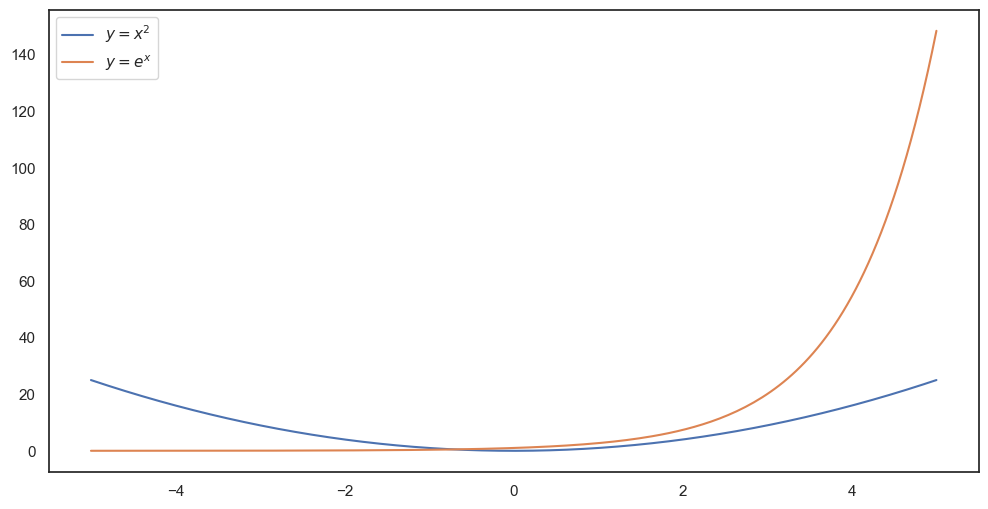

In [138]:
# your code here

x = np.linspace(-5, 5, 200)
y1 = x**2
y2 = np.exp(x)

plt.plot(x, y1, label="$y=x^2$")
plt.plot(x, y2, label="$y=e^x$")
plt.legend(loc="best")

plt.show()

#### As a bonus challenge, try to add a legend to the plot.

Text(0.5, 0.98, 'Cool noodles')

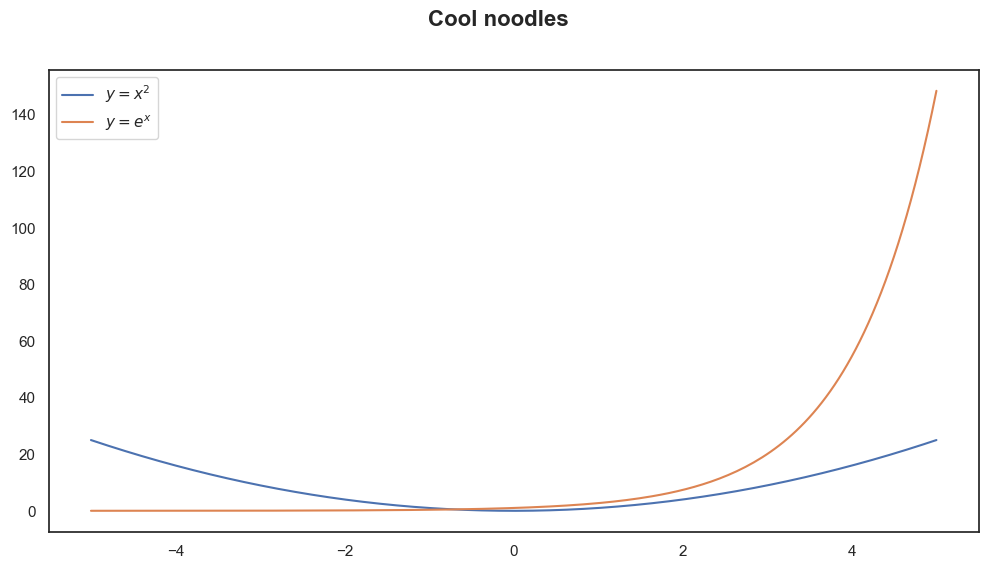

In [139]:
# your code here

x = np.linspace(-5, 5, 200)
y1 = x**2
y2 = np.exp(x)

plt.plot(x, y1, label="$y=x^2$")
plt.plot(x, y2, label="$y=e^x$")
plt.legend(loc="best")

plt.suptitle("Cool noodles", fontsize=16, fontweight="bold")

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [140]:
# your code here

fitbit = pd.read_csv("Fitbit2.csv")
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

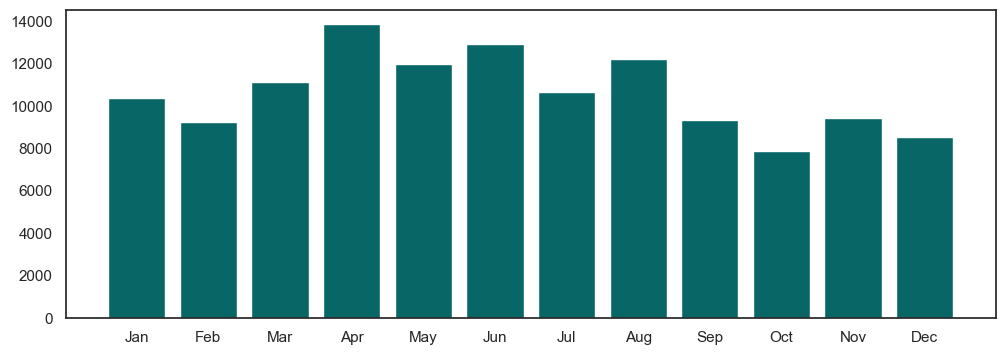

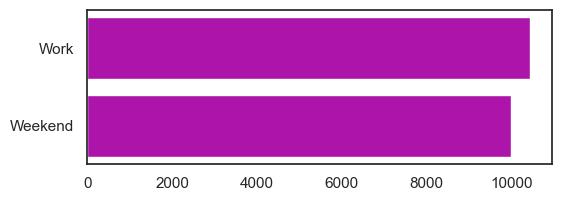

In [141]:
# MEDIAN STEPS BY MONTH_ENCODED
# your code here

steps = fitbit.groupby("Months_encoded").agg({"Steps":"median"}).squeeze()

plt.figure(figsize = (12,4))
plt.bar(steps.index, steps.values, color= "#086667")
plt.xticks(steps.index, ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])

plt.savefig("median_steps_month.png")

plt.show()



# MEDIAN STEPS BY WORK_OR_WEEKEND
# your code here

steps1 = fitbit.groupby("Work_or_Weekend").agg({"Steps":"median"}).squeeze()

fig = plt.figure(figsize= (6, 2))
plt.barh(steps1.index, steps1.values, color= "#AD14A9")
plt.yticks([0, 1], ["Weekend", "Work"])
plt.savefig("median_steps_work_or_weekend.png")
plt.show()

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

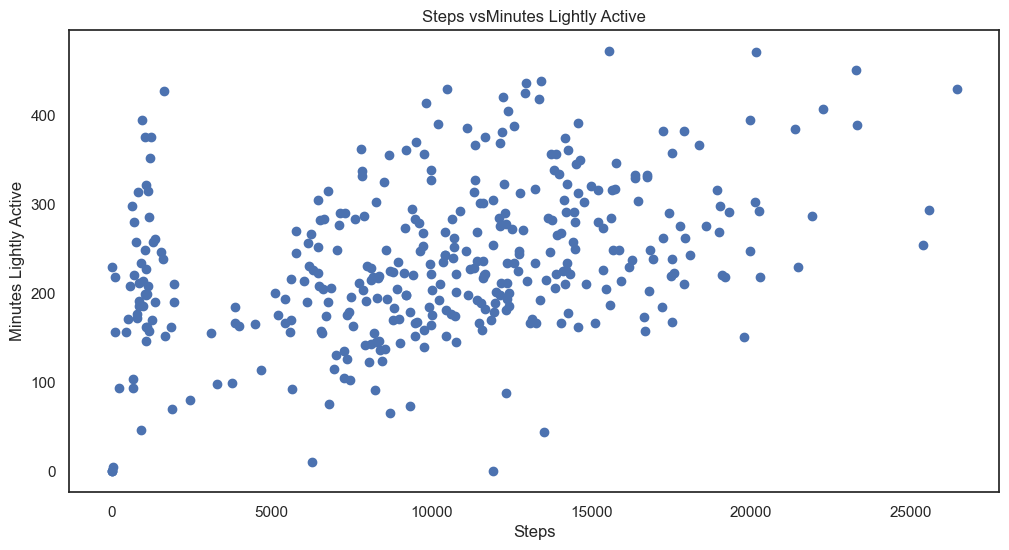

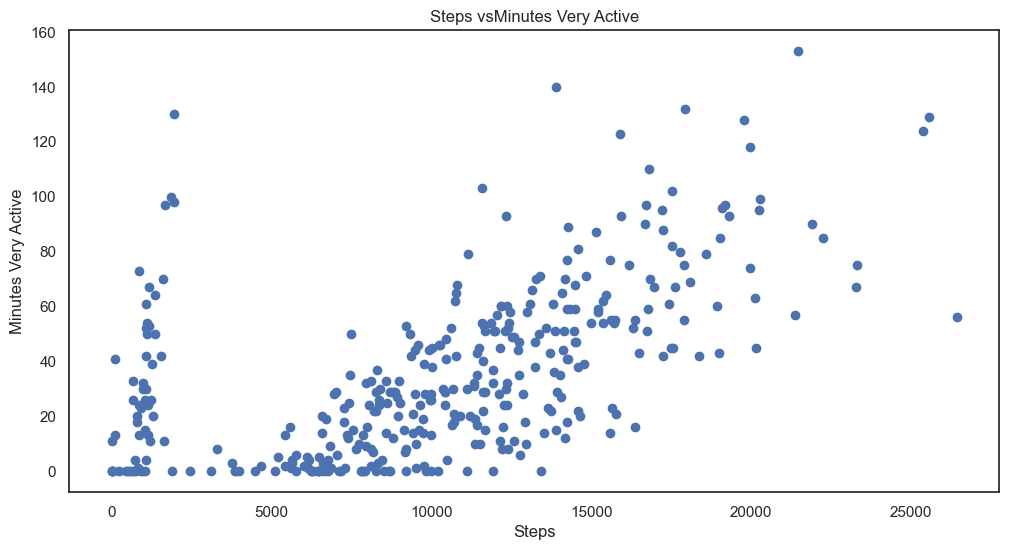

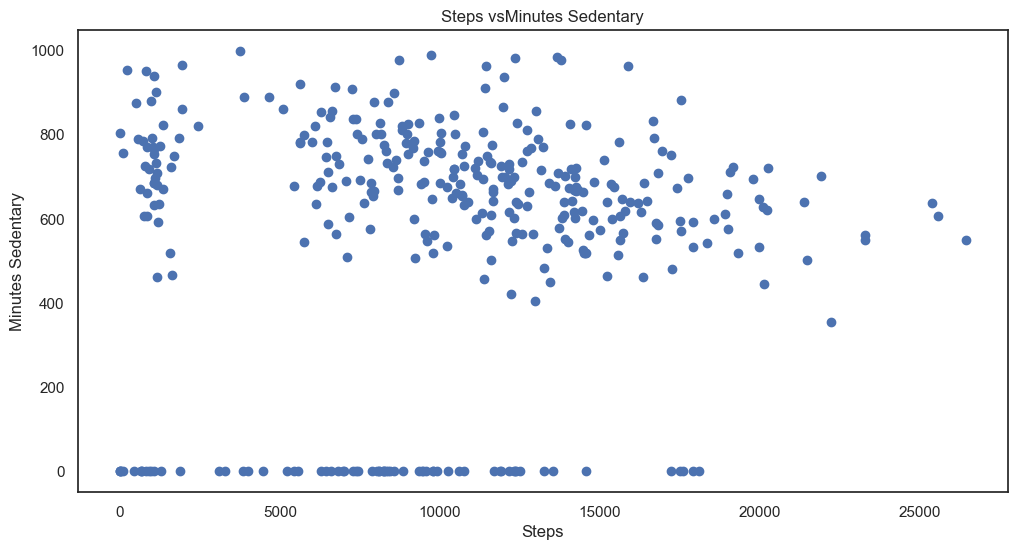

In [142]:
# your code here

columns = ["Minutes Lightly Active", "Minutes Very Active", "Minutes Sedentary"]

for title_col in columns:
    plt.figure()
    plt.ylabel(title_col)
    plt.xlabel("Steps")
    plt.title("Steps vs" + title_col)
    plt.scatter(fitbit["Steps"], fitbit[title_col])

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [143]:
# your code here

titanic = pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [144]:
# your code here

titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [145]:
# NUMERICAL VARIABLES
# your code here

titanic.select_dtypes(include = "number")

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [146]:
# CATEGORICAL VARIABLES
# your code here

titanic.select_dtypes(include = "object")

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [147]:
# your code here

sns.set(rc={"figure.figsize":(12,6)},style="white")

#### Use the right visulalization to show the distribution of column `Age`.

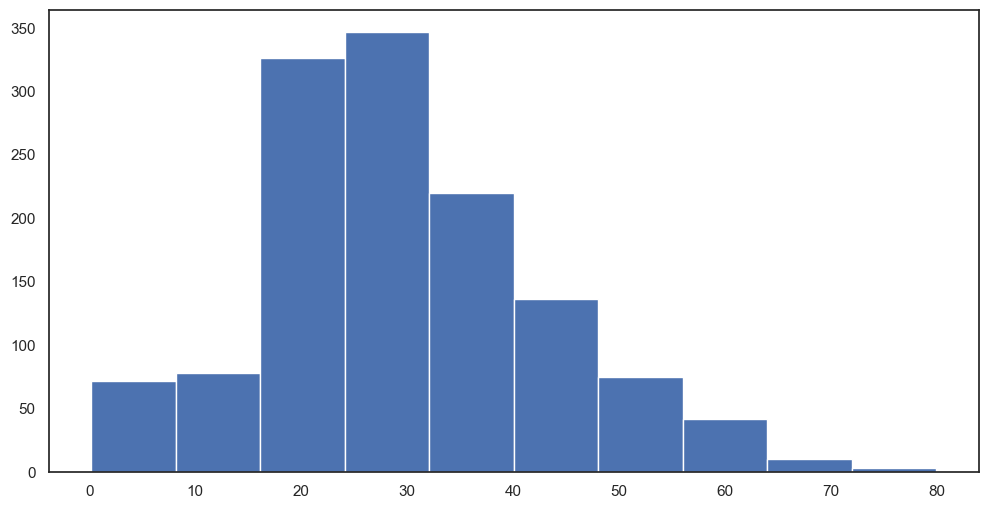

In [148]:
# your code here
plt.hist(titanic["Age"])
plt.show()

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

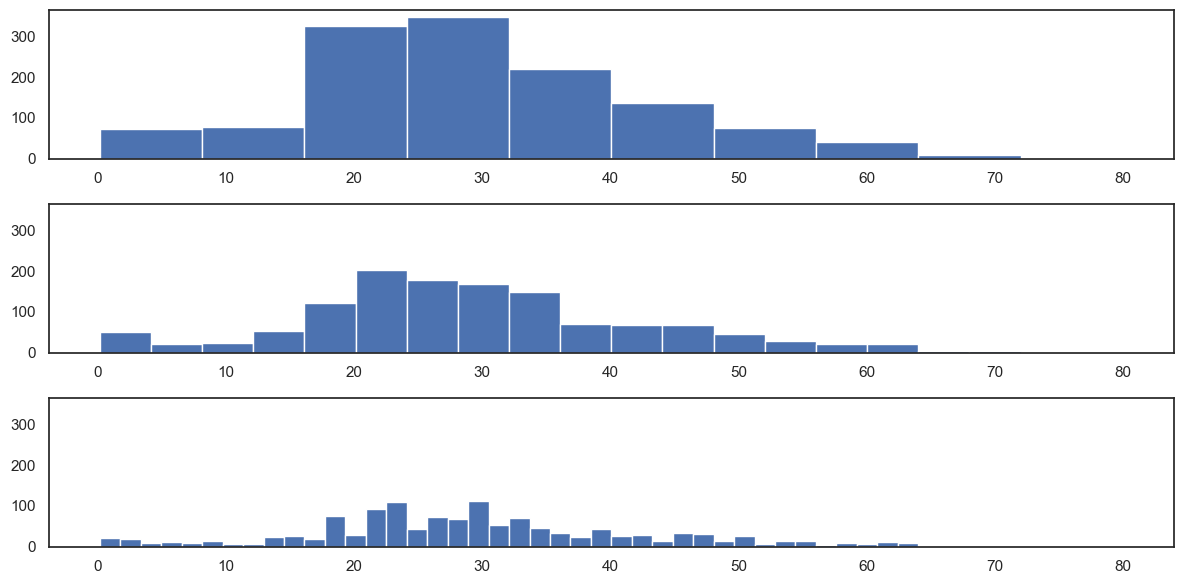

In [149]:
# your code here

fig, axs = plt.subplots(3, 1, sharey=True, tight_layout=True)

# We can set the number of bins with the *bins* keyword argument.
axs[0].hist(titanic["Age"], bins=10)
axs[1].hist(titanic["Age"], bins=20)
axs[2].hist(titanic["Age"], bins=50)
plt.show()

#### How does the bin size affect your plot?

In [150]:
"""
your comments here
"""

# the more bins, the more detailed the information on the given data

'\nyour comments here\n'

#### Use seaborn to show the distribution of column `Age`.

/var/folders/kf/l96v4j7x7lg_xqb30j9tzfk00000gn/T/ipykernel_65089/1919000792.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic["Age"])
/var/folders/kf/l96v4j7x7lg_xqb30j9tzfk00000gn/T/ipykernel_65089/1919000792.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic["Age"], ax=axs[0

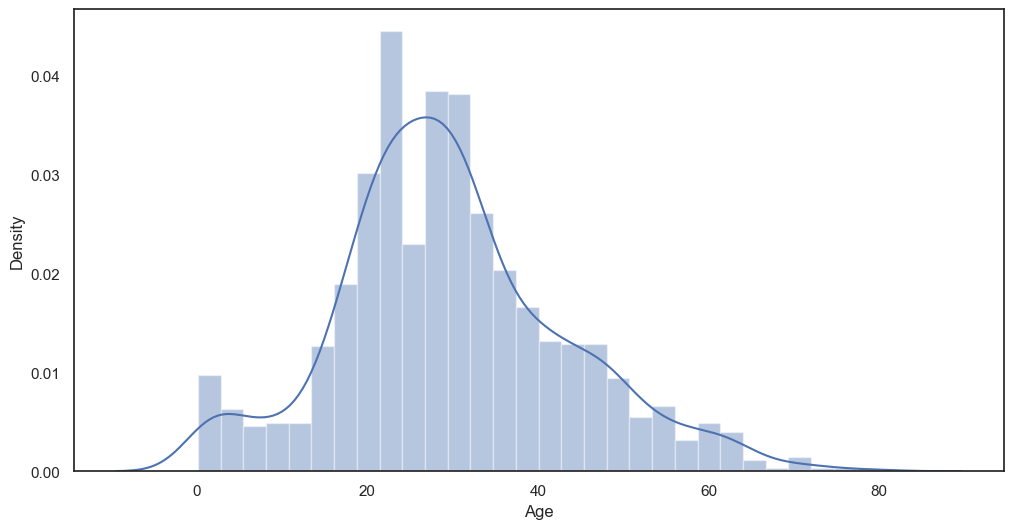

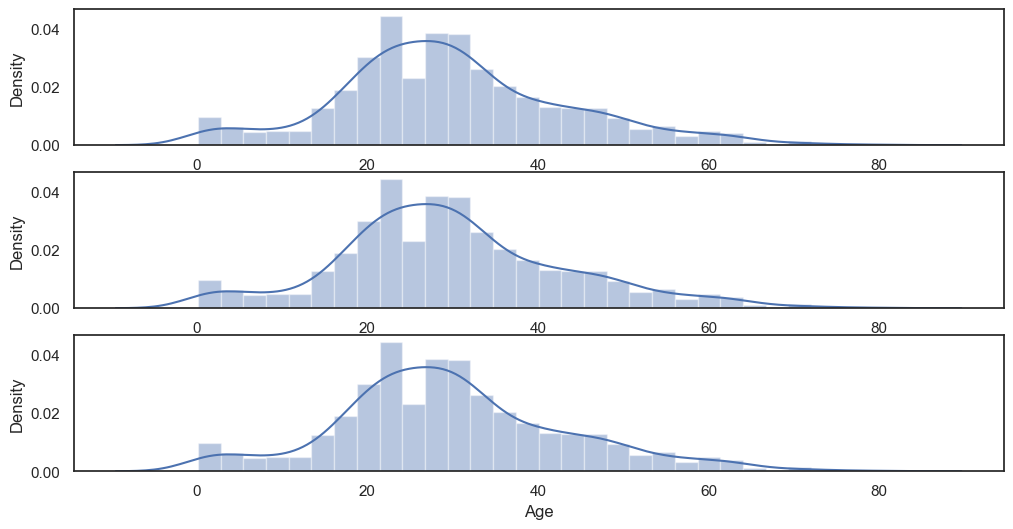

In [158]:
# your code here

sns.distplot(titanic["Age"])

f, axs = plt.subplots(3, 1, figsize=(12, 6))

sns.distplot(titanic["Age"], ax=axs[0])
sns.distplot(titanic["Age"], ax=axs[1])
sns.distplot(titanic["Age"], ax=axs[2])

plt.show()

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

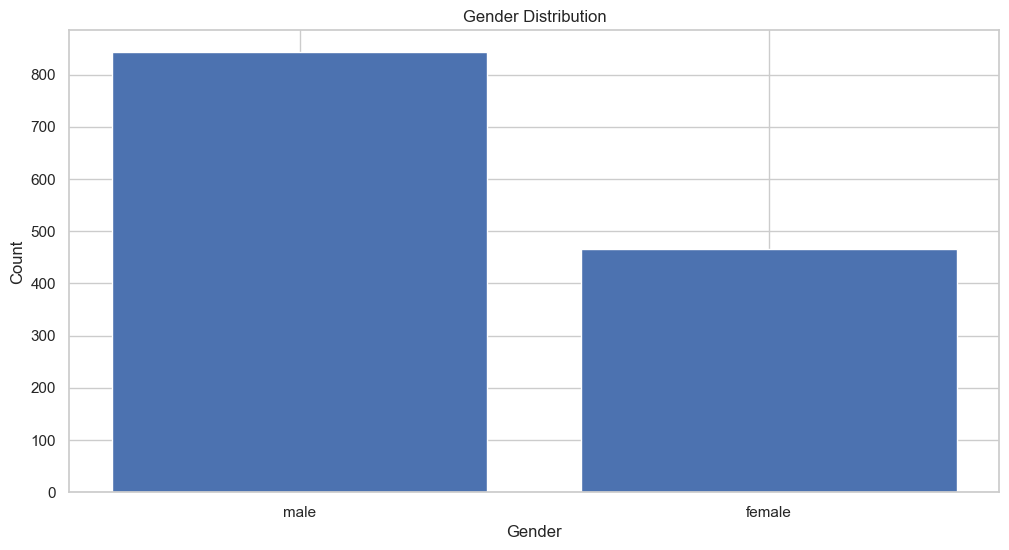

In [170]:
# Method 1 - matplotlib
# your code here

gender_counts = titanic["Gender"].value_counts()

plt.bar(gender_counts.index, gender_counts.values).figsize=(12, 6)
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

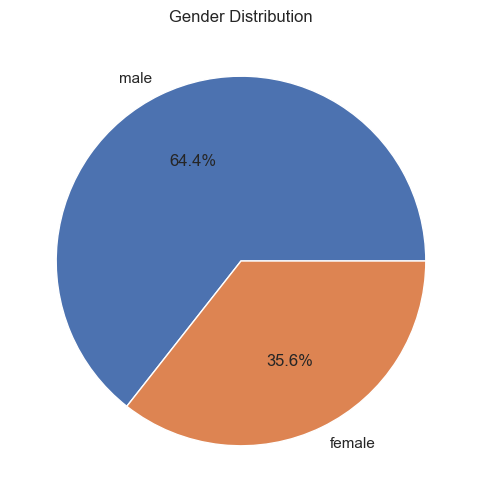

In [171]:
# Method 2 - seaborn
# your code here

gender_counts = titanic["Gender"].value_counts()

plt.figure(figsize=(12, 6))
plt.title("Gender Distribution")
plt.pie(gender_counts.values, labels = gender_counts.index, autopct='%1.1f%%')

plt.show()


# I know the pie chart is forbidden but here i felt it made sense

#### Use the right plot to visualize the column `Pclass`.

<Axes: xlabel='Pclass'>

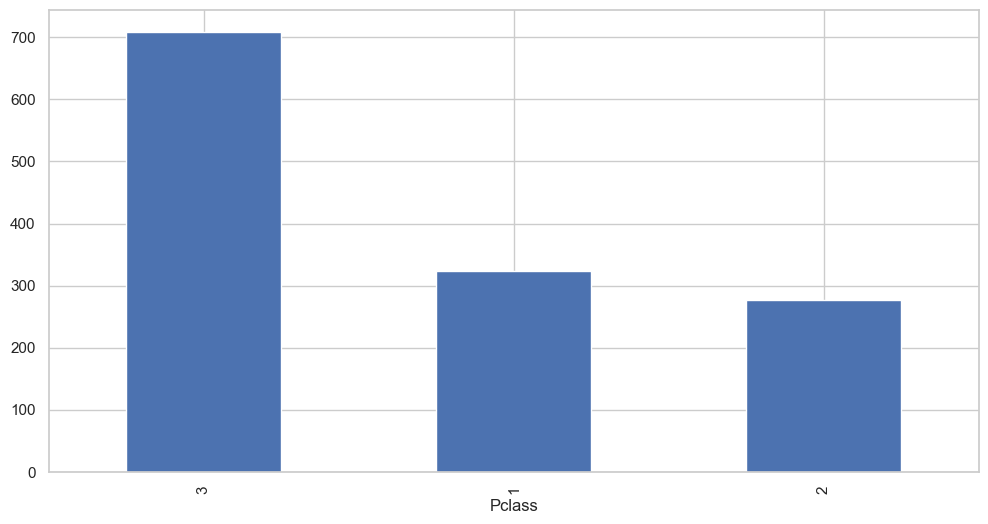

In [174]:
# your code here

titanic["Pclass"].value_counts().plot.bar()

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

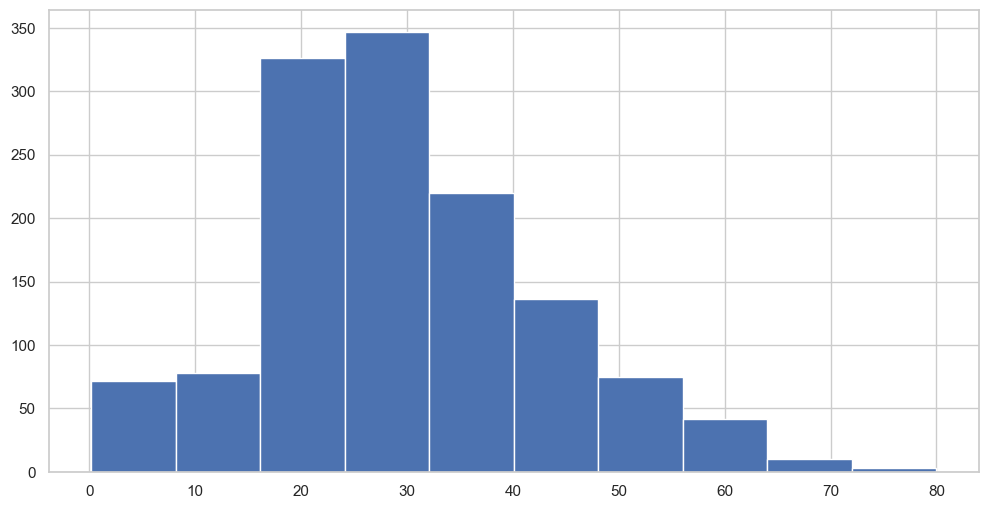

In [175]:
# your code here

plt.hist(titanic['Age'])
plt.show()

In [176]:
"""
your comments here
"""

# using the histogram we can have a good idea of the min, the max, the outliers and more

'\nyour comments here\n'

#### What does the last plot tell you about the feature `Age`?

In [ ]:
"""
your comments here
"""

# most ages are between 20 and 40
# the outlires are from 20 down and 60 up
# the 30s are the highest so the median is placed there

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

/var/folders/kf/l96v4j7x7lg_xqb30j9tzfk00000gn/T/ipykernel_65089/1445289644.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(titanic['Age'], shade=True, color='blue')


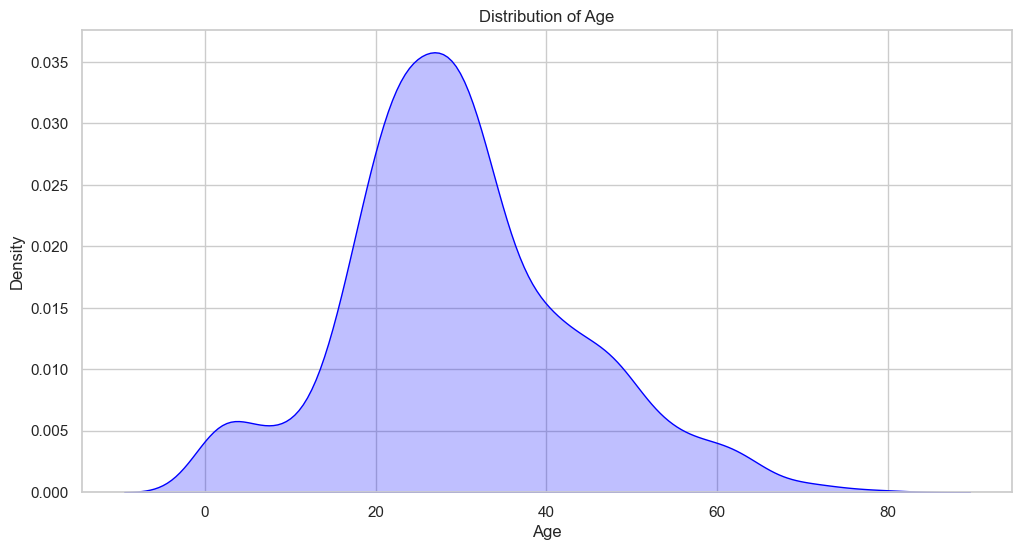

In [178]:
# your code here

sns.kdeplot(titanic['Age'], shade=True, color='blue')

plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Distribution of Age')

plt.show()

#### What additional information does the last plot provide about feature `Age`?

In [179]:
"""
your comments here
"""

# shows a more in depth look on the density for age distribution 

'\nyour comments here\n'

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

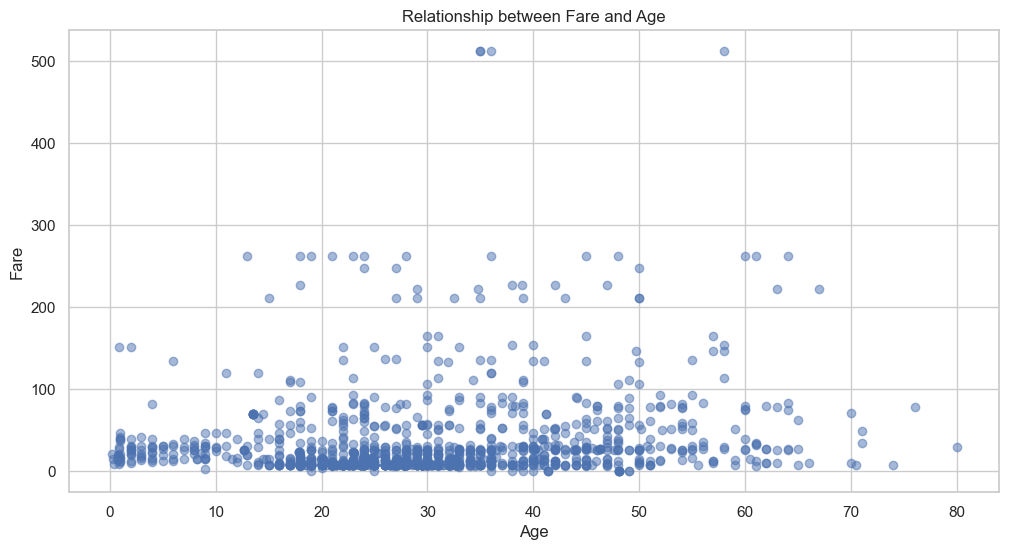

In [181]:
# Method 1 - matplotlib
# your code here


plt.scatter(titanic["Age"], titanic["Fare"], alpha=0.5)

# Add labels and title
plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("Relationship between Fare and Age")

plt.show()

Text(0.5, 1.0, 'Relationship between Fare and Age')

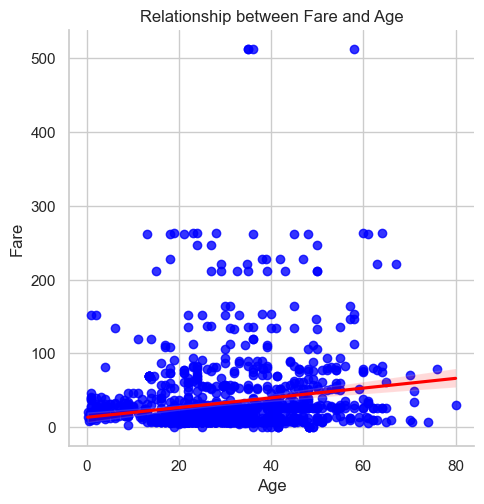

In [182]:
# Method 2 - seaborn
# your code here

sns.lmplot(x="Age", y="Fare", data=titanic, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("Relationship between Fare and Age")


#### Plot the correlation matrix using seaborn.

In [183]:
# your code here

corr = titanic.corr()

sns.heatmap(corr, cmap="coolwarm", annot=True, square=True)
plt.title("Correlation Matrix of Titanic Dataset")

plt.show()


# excuse me but what the hell does that mean in my lovely plot?

ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

#### What are the most correlated features?

In [ ]:
"""
your comments here
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

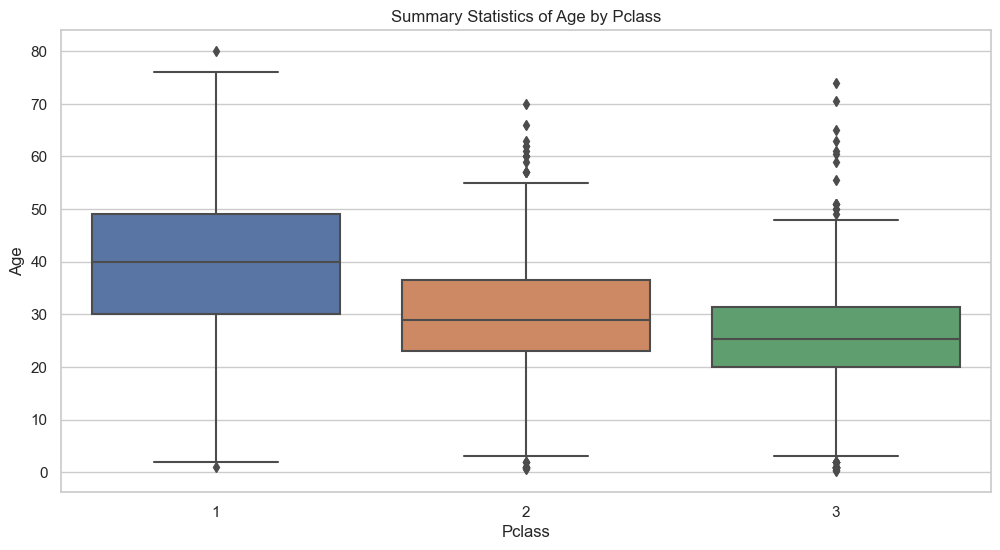

In [184]:
# your code here


sns.boxplot(x="Pclass", y="Age", data=titanic)

# Add labels and title
plt.xlabel("Pclass")
plt.ylabel("Age")
plt.title("Summary Statistics of Age by Pclass")

plt.show()

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

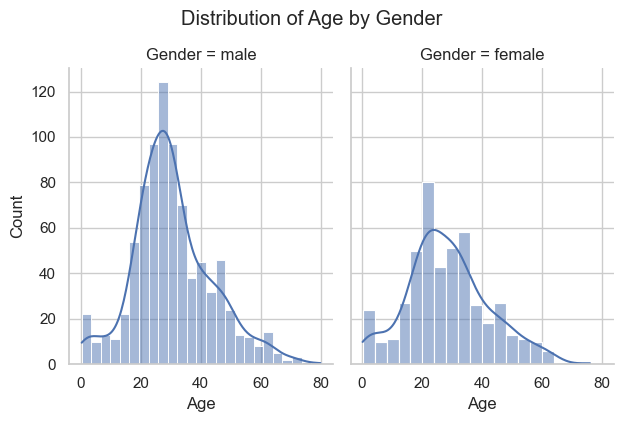

In [186]:
# your code here

g = sns.FacetGrid(titanic, col="Gender", height=4, aspect=0.8)


g.map(sns.histplot, "Age", kde=True)
g.set_axis_labels("Age", "Count")
g.fig.suptitle("Distribution of Age by Gender", y=1.05)

plt.show()